<a href="https://colab.research.google.com/github/Alyona18/intelligent-systems-HW/blob/main/first/Pandas_amp_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
URL = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(URL, sep='\t')

#5. Измените тип переменной item_price c с помощью лямбды функции
df['item_price'] = df['item_price'].apply(lambda x: x.replace('$', '')).astype('float')

#price of chips pack
chips_price = df[df.item_name == 'Chips'][df.quantity == 1]
chips = chips_price['item_price'].mode().values

#for dividing chips with souces 
for row, index in df[df.item_name.str.contains('and')].iterrows():
      item1, item2 = index[2].split(" and ")
      df = df.append(index, ignore_index=True)
      df.loc[df.index == row, 'item_name'] = item2
      price_before = index[4]
      quan = index[1]
      df.loc[df.index == row, 'item_price'] = (price_before - chips*quan)
      df.update(df.item_name[df.item_name.eq(index[2])][df.order_id.eq(index[0])].fillna(item1))
      df.loc[df.order_id.eq(index[0]) & df.item_name.eq(index[2]), 'item_name'] = item1
      last = df.tail(1).index.start
      df.loc[(df.item_name.eq('Chips') & df.order_id.eq(index[0])) & (df.index == last), 'item_price'] = (quan*chips)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1. Вывести: кол-во наблюдений в датасете

In [3]:
num_of_rows = len(df.axes[0])
print("Number of rows: ", num_of_rows)

Number of rows:  5394


2. Вывести названия столбцов

In [4]:
columns_names = df.columns.values
print(columns_names)

['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


3. Определить самую частую позицию (item) в заказе

In [5]:
df.item_name.mode()

0    Chips
dtype: object

4. Построить гистрограмму частоты заказов по позициям (item )

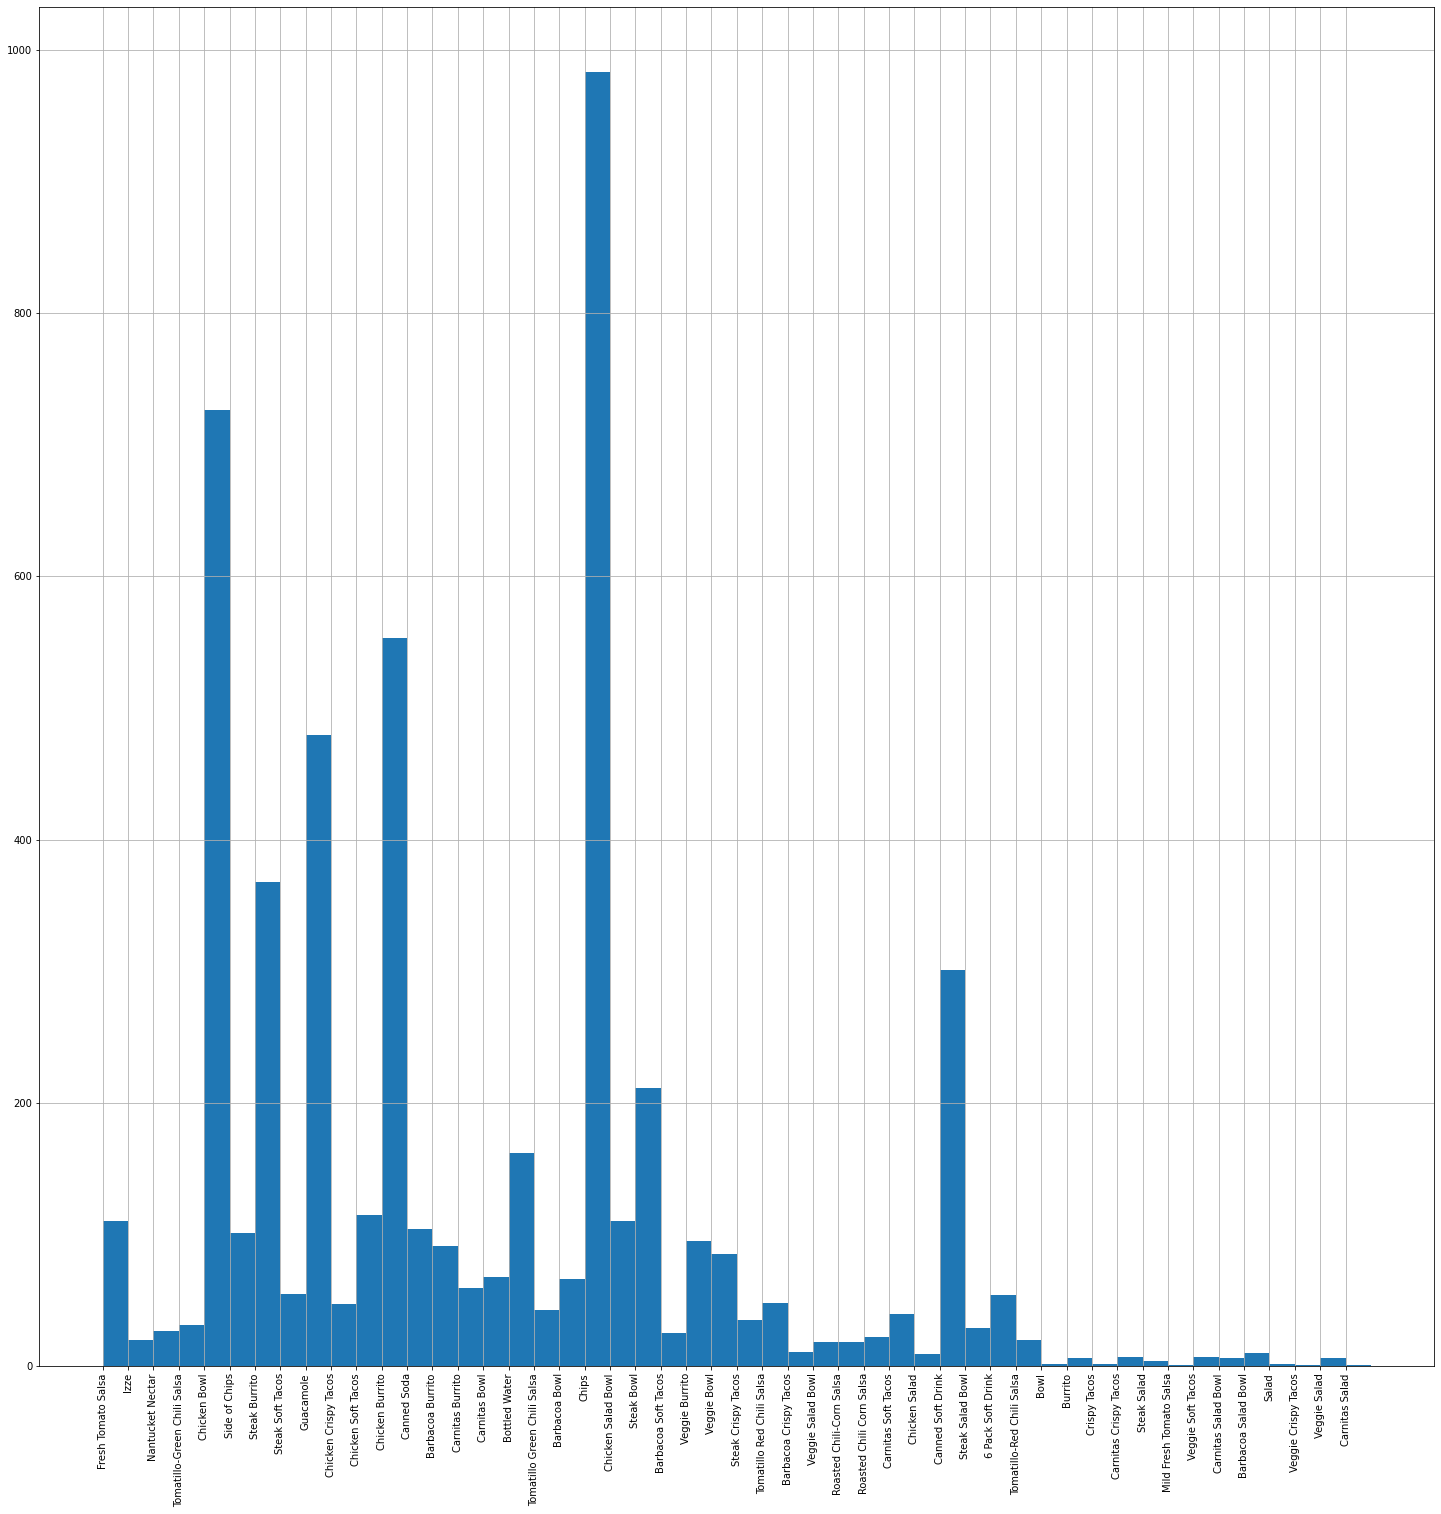

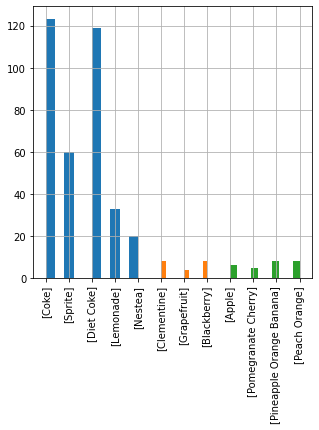

In [6]:
 import matplotlib.pyplot as plt


fig = plt.figure(figsize = (25,25))
ax = fig.gca()
df['item_name'].hist(ax = ax, xrot = 90, bins=50, range=(0,50))


sub_of_Drink = df[df.item_name.str.contains('Drink')]
fig = plt.figure(figsize = (5,5))
bx = fig.gca()
sub_of_Drink['choice_description'].hist(ax=bx, xrot = 90)

sub_of_Izze = df[df.item_name.str.contains('Izze')]
sub_of_Izze['choice_description'].hist(ax=bx, xrot = 90)

sub_of_Nectar = df[df.item_name.str.contains('Nectar')]
sub_of_Nectar['choice_description'].hist(ax=bx, xrot = 90)




6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)



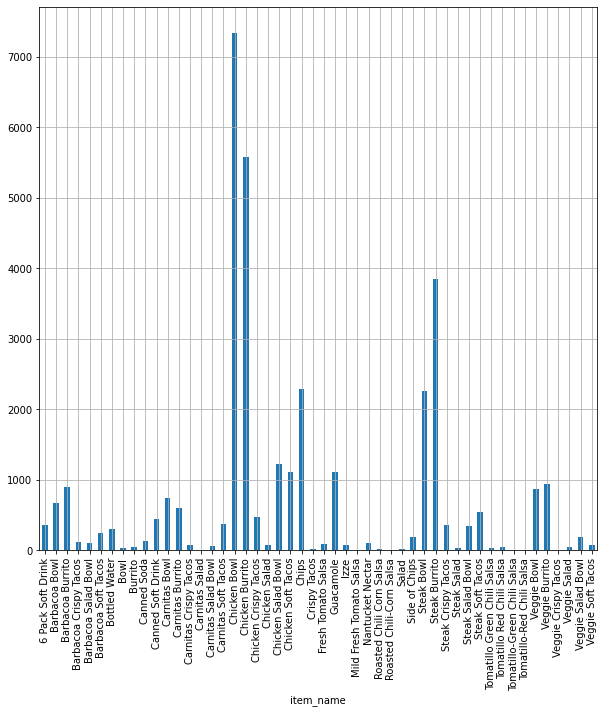

In [7]:
df.head()
fig = plt.figure(figsize = (10,10))
bx = fig.gca()

df.groupby('item_name').item_price.sum().plot.bar(ax=bx, grid=True)




7. Средняя сумма заказа? (минимум 2 способа)

In [18]:
# first method

print('mean sum (1st) = ' ,df.groupby(['order_id'])['item_price'].sum().mean())

# 2nd method

sum_by_order_id = df.groupby(['order_id'])['item_price'].sum()
number_of_orders = df['order_id'].nunique()
mean_sum = sum_by_order_id.sum()/number_of_orders
print('mean sum (2nd) = ', mean_sum)


mean sum (1st) =  18.81142857142869
mean sum (2nd) =  18.811428571428568


#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 
